In [3]:
import sys
sys.path.insert(0,'../omphalos')

from context import omphalos

# Import data processing modules.
import pandas as pd
import numpy as np

# Import Omphalos modules.
import generate_inputs as gi
import file_methods as fm
import my_metrics as mm
import omphalos_plotter as op
import attributes as attr
import labels as lbls

# Import data visualisation modules.
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

### Import and extract data

In [4]:
train_set = fm.unpickle('data/1086_data.pickle')
attributes_df = attr.initial_conditions(train_set, primary_species=True)
labels_df = lbls.secondary_precip(train_set)

/usr/local/lib/python3.8/site-packages/pandas/core/frame.py:6390: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = expressions.where(mask, this, that)


In [5]:
x = attributes_df.loc[:, ['SO4--','Ca++', 'Formaldehyde', 'CO2(aq)']].xs(1, level=1)
y = labels_df.xs(9, level=1)['Calcite'] + labels_df.xs(9,level=1)['Calcite44']

## Visualisation

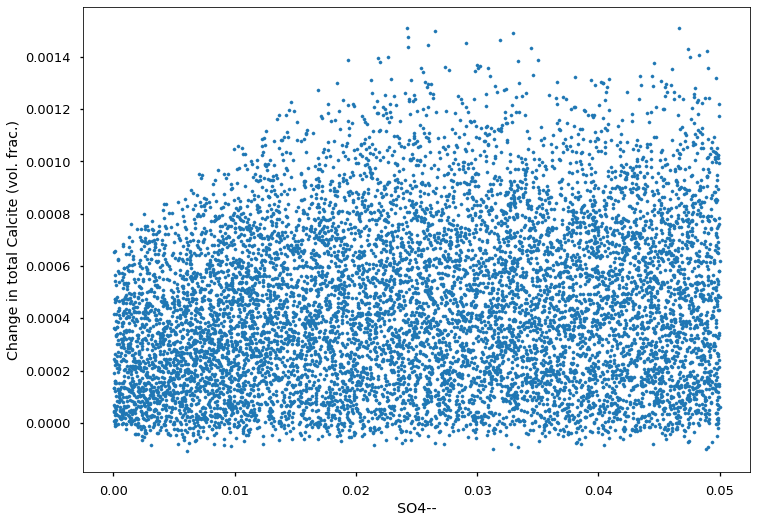

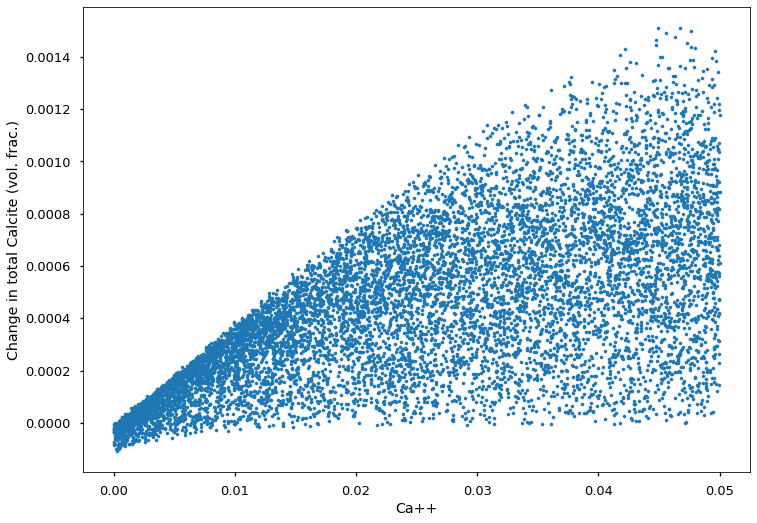

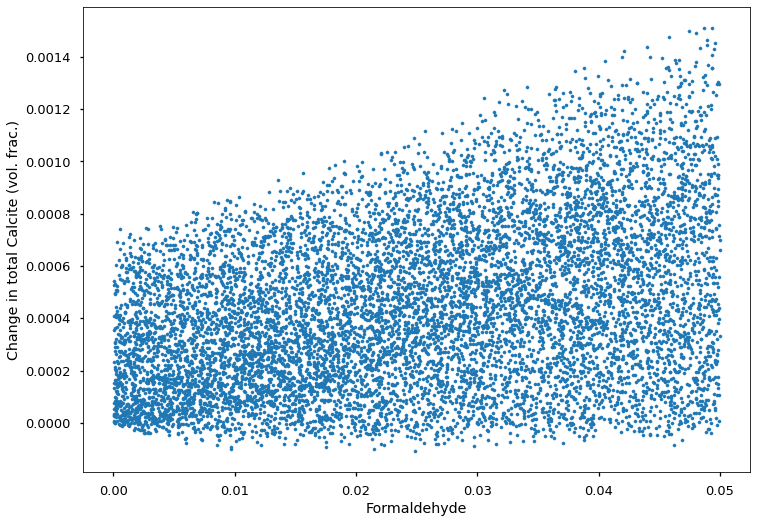

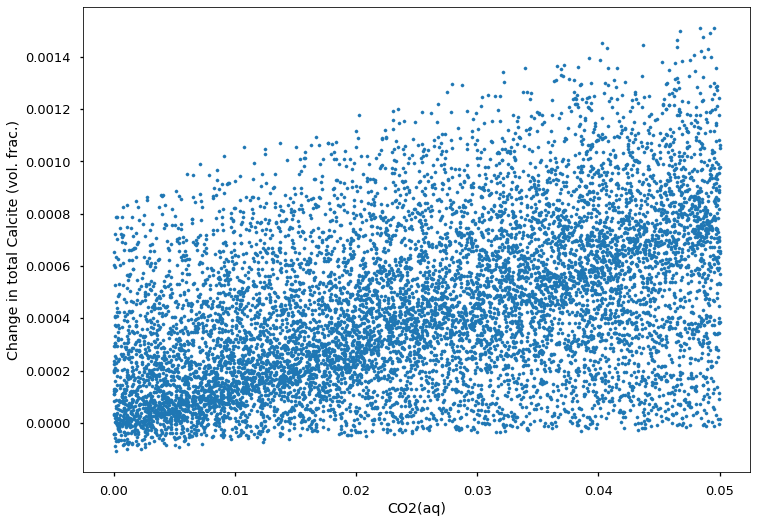

In [6]:
plt.style.use('seaborn-talk')
plot_list = ['SO4--','Ca++', 'Formaldehyde', 'CO2(aq)']
x_labels =  ['SO4--','Ca++', 'Formaldehyde', 'CO2(aq)']


for x_label, species in zip(x_labels, plot_list):
    #g = sns.jointplot(x=x_train[species], y=y_train, kind="scatter", marker='o', s=15, height=10)
    fig, ax = plt.subplots(1, 1, constrained_layout=True)
    ax.scatter(x[species], y, s=10)
    
    ax.set_xlabel(x_label)
    ax.set_ylabel('Change in total Calcite (vol. frac.)')
    
    fig.savefig('figures/scatter_{}'.format(species))

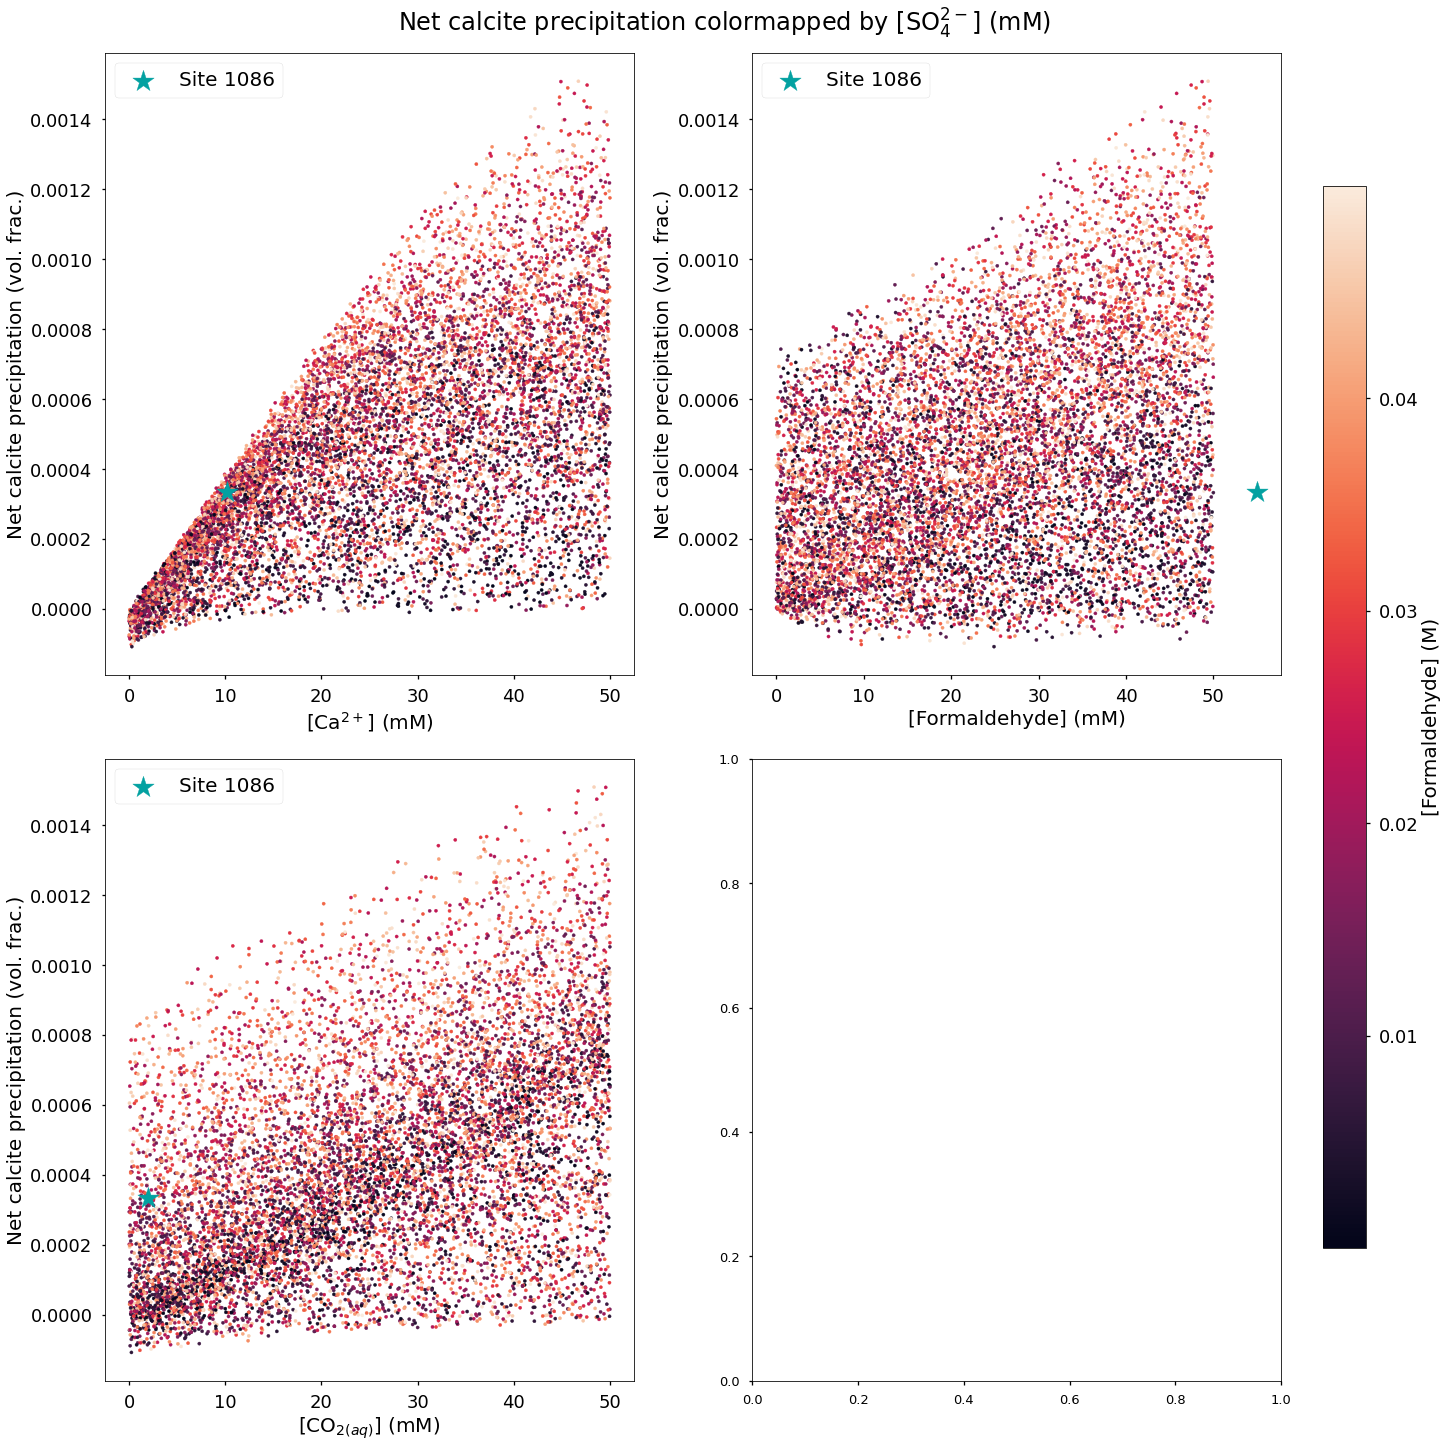

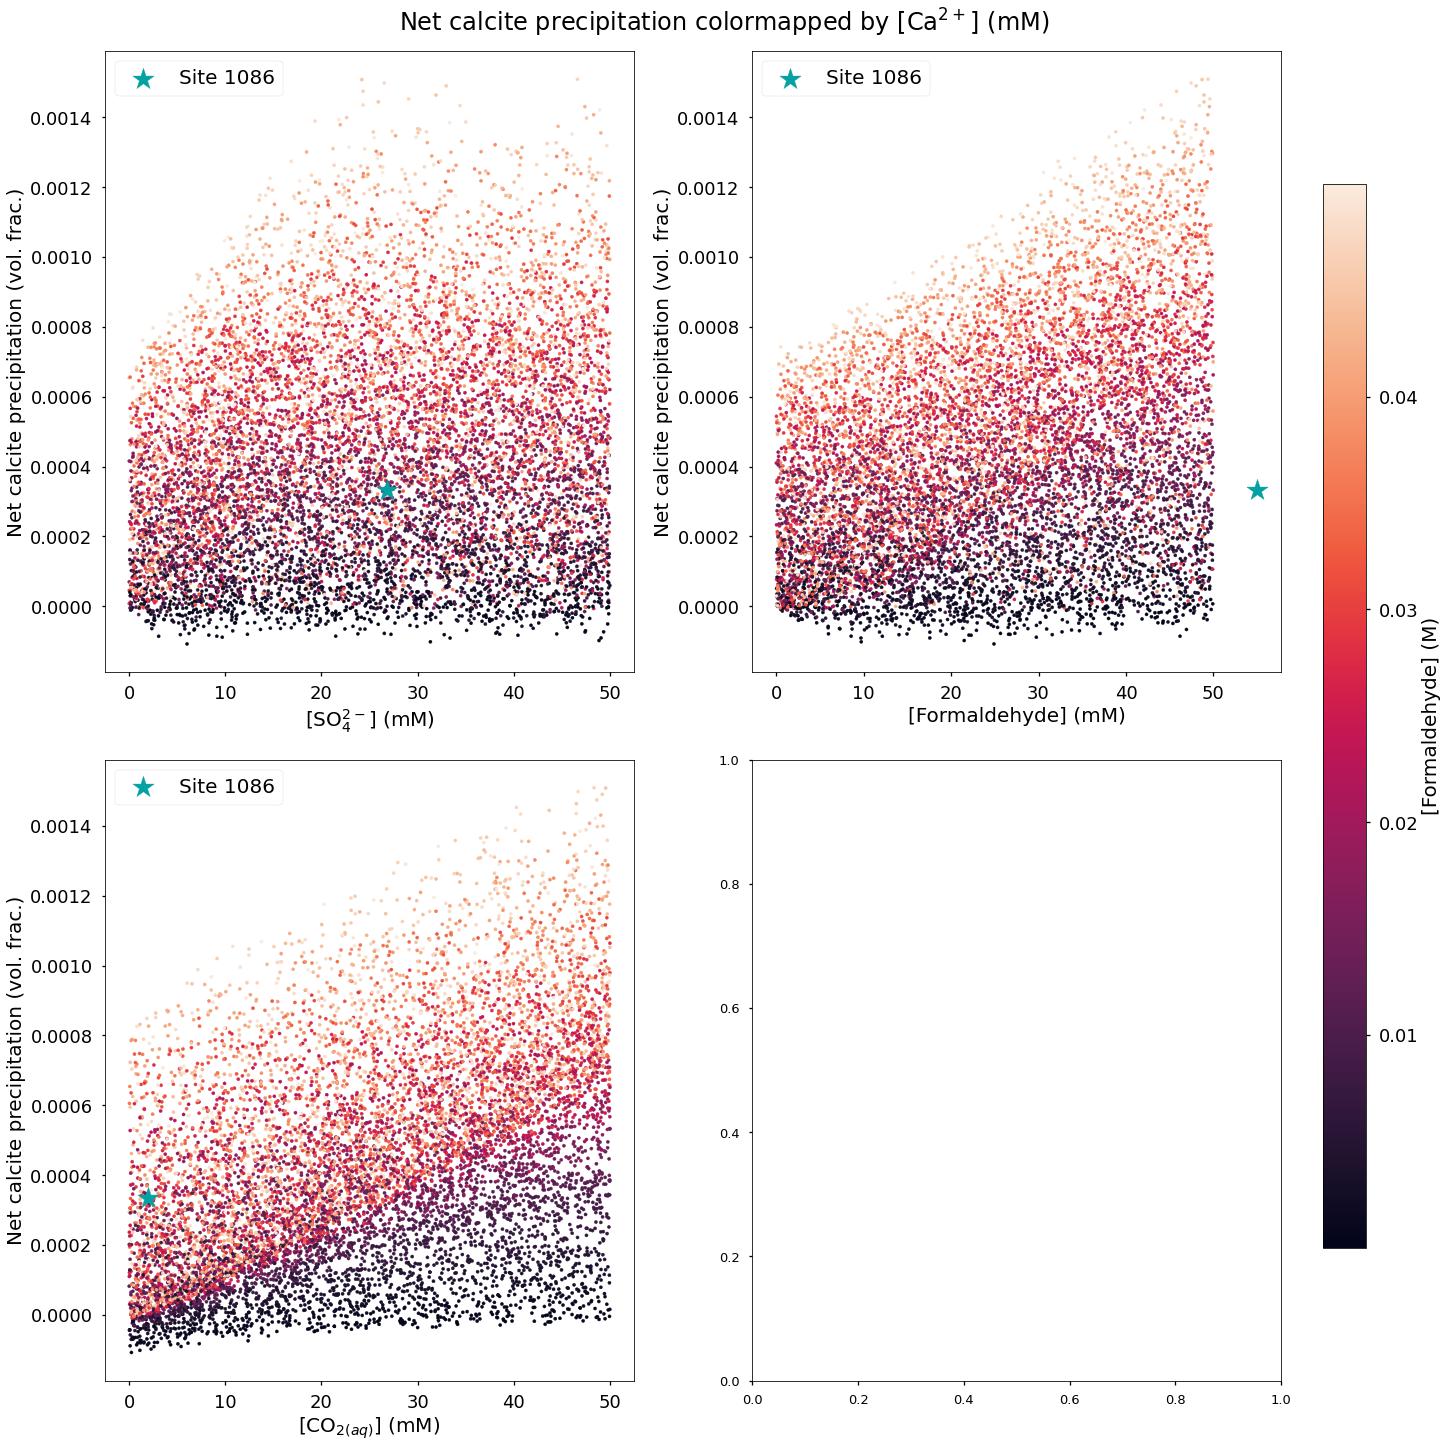

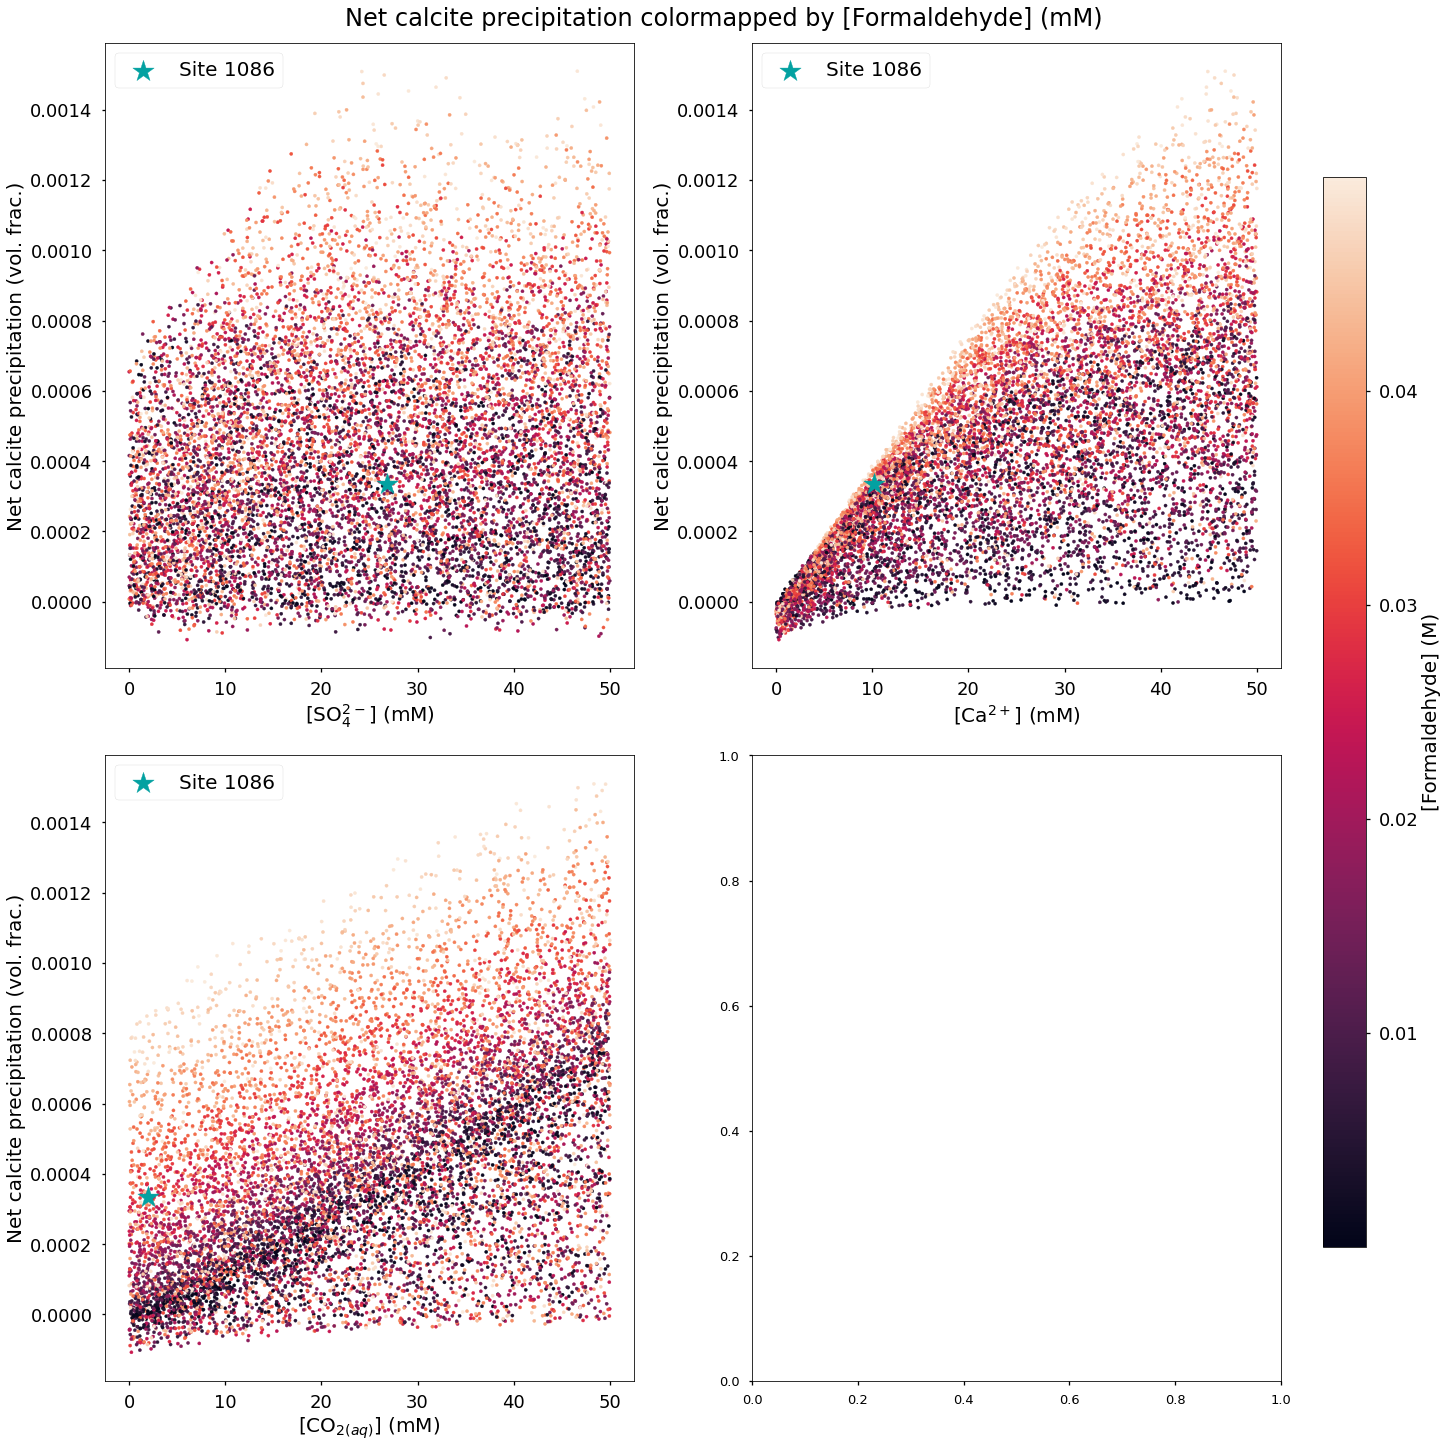

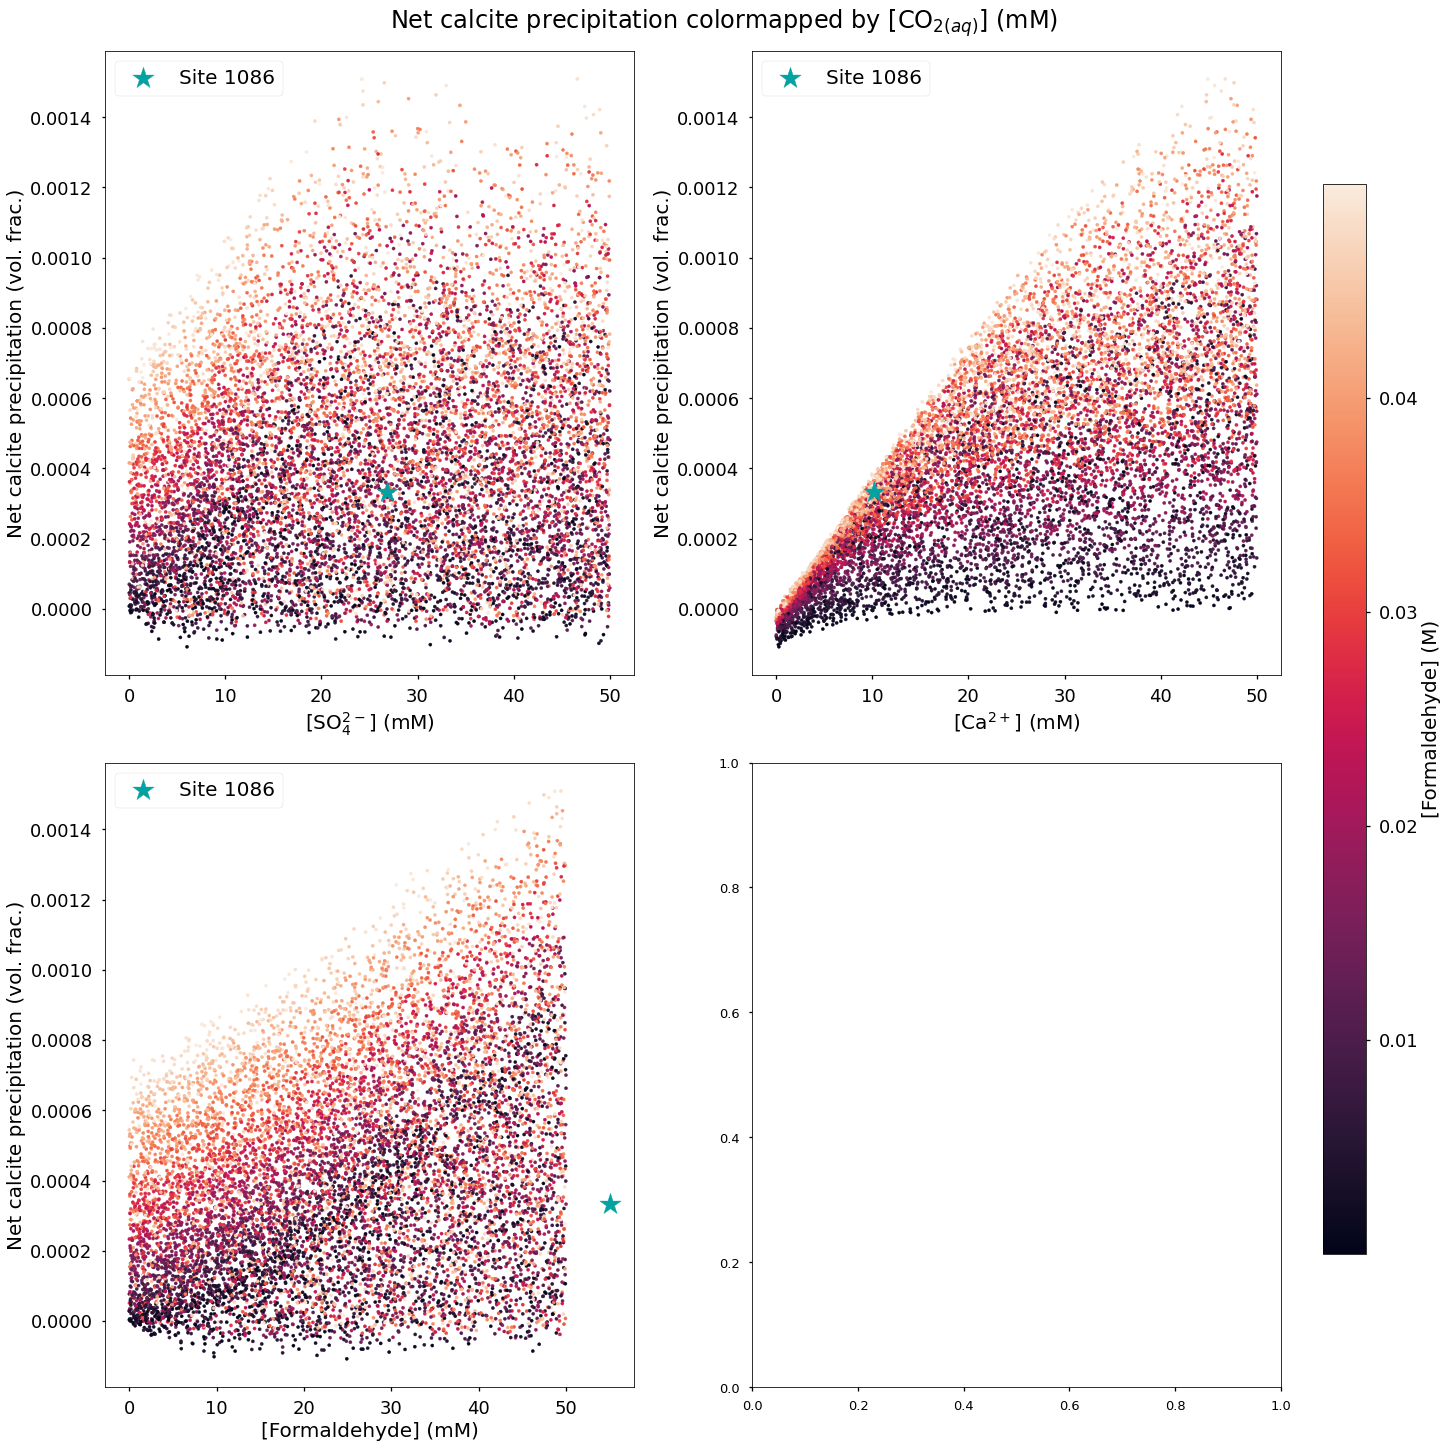

In [8]:
plt.style.use('seaborn-talk')

name_list = ['SO4--','Ca++', 'Formaldehyde', 'CO2(aq)']

for i, cmap_var in enumerate(name_list):
    
    plot_list = ['SO4--','Ca++', 'Formaldehyde', 'CO2(aq)']
    x_labels =  ['[SO$_4^{2-}$] (mM)','[Ca$^{2+}$] (mM)', '[Formaldehyde] (mM)', '[CO$_{2(aq)}$] (mM)']
    
    default_vals=[26.79609e-03, 1.01838314236e-02,  0.55e-01, 2.00e-03]
    default_precip = 0.0003343210000000263
    plot_list.pop(i)
    default_vals.pop(i)
    cmap_label = x_labels.pop(i)
    
    fig, ax = plt.subplots(2, 2, figsize=(20, 20), constrained_layout=True)
    for x_label, species, default, axis in zip(x_labels, plot_list, default_vals, ax.reshape(-1)):
        im = axis.scatter(x=x[species]*1000, y=y, c=x[cmap_var], cmap='rocket', s=10)
        axis.scatter(default*1000, default_precip, marker='*', c='#03A1A1', s=500,label='Site 1086')
        axis.set_xlabel(x_label, fontsize=20)
        axis.set_ylabel('Net calcite precipitation (vol. frac.)', fontsize=20)
        axis.tick_params('both', labelsize=18)
        axis.legend(fontsize=20)

    cbar = fig.colorbar(im, ax=ax[:,1], shrink=0.8)
    cbar.set_label('[Formaldehyde] (M)', fontsize=20)
    cbar.ax.tick_params(labelsize=18)
    fig.suptitle('Net calcite precipitation colormapped by {}'.format(cmap_label), fontsize=24)
    fig.savefig('/Users/angus/PhD_pres/1086_plots/shaded_{}'.format(cmap_var), dpi=300)